# Climate Analysis and Exploration

In this section basic analysis will be done:

+ precipitation analysis
+ station analysis
+ temperature analysis

For all above section queries will have to be built using SQLAlchemy.
All queries have been defined as functions and can be found in the py file called session_queries.py
This py file must be imported to run any analysis.

Below plots were created:

1. (**line plot**) precipitation over the last year (going back one year as from the most recent measurement date)
2. (**histogram**) temperature frequencies over the last year for the station (WAIHEE 837.5, HI US) 
  with the most observation counts (2772)
3. (**bar chart**) daily normals (min, max and avg temperature) for your planned trip
4. (**stacked plot**) daily normals (min, max and avg temperature) for your planned trip

Below data is shown:

+ summary statistics for the precipitation data used in 1
+ number of weather stations
+ observation counts per station in descending order
+ most active station (station with most observations)
+ temperature normals for your planned trip
+ rainfall per weather station for previous year's matching dates (based on planned trip dates)
+ daily normals (min, max and avg temperature) for a specific date (in date format YY-MM)

In [1]:
# Declare dependencies
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.dates as md
import matplotlib.pyplot as plt
import session_queries as sq

# Precipitation Analysis

In [2]:
# Convert to pandas dataframe
precipitation_df = pd.DataFrame(sq.prec_last_12_months())

In [3]:
# Convert "date" data to datetime and set index on date
precipitation_df['date'] = pd.to_datetime(precipitation_df["date"]).dt.date
precipitation_df.set_index(["date"], inplace = True)

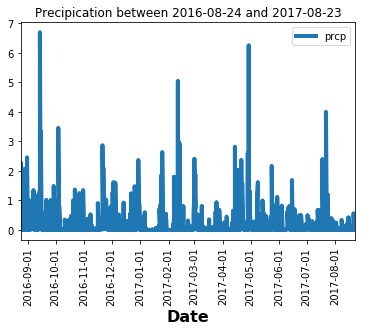

In [4]:
# Plot precipitation against date using plotting Dataframe accessor and method

# Variables
min_date = precipitation_df.index.min()
max_date = precipitation_df.index.max()

# Create line plot
precipitation_df.plot(kind = "line", linewidth = 4)

# Set labels and title
plt.xlabel("Date", fontweight = 'bold', size = 16)
plt.title(f"Precipication between {(datetime.strptime(sq.first_date()[0],'%Y-%m-%d').date() + timedelta(days=1)).strftime('%Y-%m-%d')} and {sq.first_date()[1]}")

# Set scale range
plt.xlim(min_date, max_date)

# Format data (dates) on x axis
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)

# Rotate ticks on x axis and set figure size
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (12,9)

plt.show()

In [5]:
# Summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [6]:
# Total number of stations
print(f"Number of stations is {sq.station_count()}")

Number of stations is 9


In [7]:
# Observation counts per station in descending order
station_obs_df = pd.DataFrame(sq.station_obs(), columns = ["Station name", "Observation counts"])
station_obs_df

,Station name,Observation counts
0,"WAIHEE 837.5, HI US",2772
1,"KANEOHE 838.1, HI US",2696
2,"WAIKIKI 717.2, HI US",2685
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,"MANOA LYON ARBO 785.2, HI US",2484
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,"PEARL CITY, HI US",683
8,"UPPER WAHIAWA 874.3, HI US",342


In [8]:
# Most active station
most_active = station_obs_df.loc[station_obs_df["Observation counts"].idxmax()]
x = most_active["Station name"]
y = most_active["Observation counts"]
print(f"Station {x} had the most observation counts being {y}")

Station WAIHEE 837.5, HI US had the most observation counts being 2772


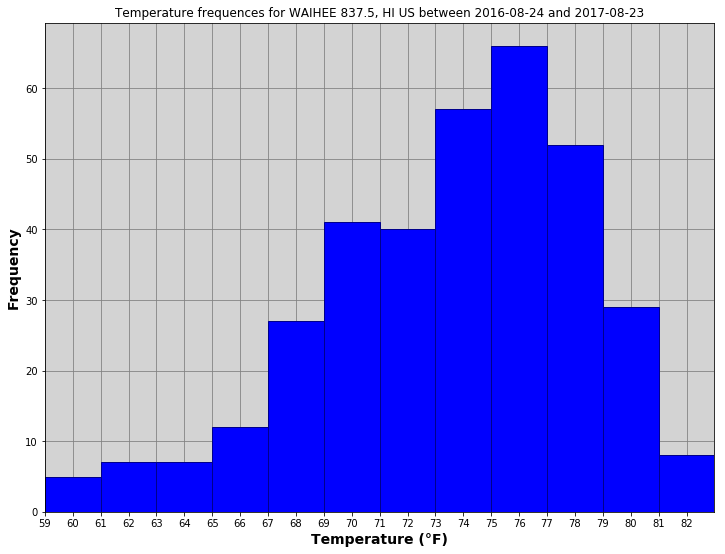

In [9]:
# Plot the results as a histogram with `bins=12`
tobs_df = pd.DataFrame(sq.year_observation(x), columns=["tobs"])
x_axis = tobs_df["tobs"]

# Set variables
bins = 12
bar_width = 1
min_temp = tobs_df["tobs"].min()
max_temp = tobs_df["tobs"].max()
tick_values = [x for x in np.arange(min_temp, max_temp, 1)]

# Set grid layout
ax = plt.axes(facecolor='lightgrey')
plt.grid(color='gray', linestyle='-')

# Create bar plot
plt.hist(x_axis, bins = bins, facecolor='blue', edgecolor='darkblue')

# Set grid axes behind figure
ax = plt.gca()
ax.set_axisbelow(True)

# Set labels and scales
plt.title(f"Temperature frequences for {x} between {(datetime.strptime(sq.first_date()[0],'%Y-%m-%d').date() + timedelta(days=1)).strftime('%Y-%m-%d')} and {sq.first_date()[1]}")
plt.ylabel("Frequency", fontsize = 14, fontweight = "bold")
plt.xlabel("Temperature (°F)", fontsize = 14, fontweight = "bold")
plt.xlim(min_temp,max_temp)
plt.xticks(tick_values,[x for x in tick_values])

# Set figure size
plt.rcParams["figure.figsize"] = (12,9)

plt.show()

# Temperature Analysis

In [10]:
# Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip 
# using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

trip_start  = input("Enter start for your trip (use YYYY-MM-DD format): ")
trip_end = input("Enter end for your trip (use YYYY-MM-DD format): ")

# Create list with min, avg and max temperature for your trip
trip_temps = sq.calc_temps(trip_start, trip_end)

min_temp = trip_temps[0]
avg_temp = trip_temps[1]
max_temp = trip_temps[2]

print("\n"
        f"Temperature normals for your planned trip between {trip_start} and {trip_end} are: \n\n"
        f"minimum temperature (°F): {min_temp} \n"
        f"maximum temperature (°F): {max_temp} \n"
        f"average temperature (°F): {avg_temp}")

Enter start for your trip (use YYYY-MM-DD format): 2018-05-02
Enter end for your trip (use YYYY-MM-DD format): 2018-05-12

Temperature normals for your planned trip between 2018-05-02 and 2018-05-12 are: 

minimum temperature (°F): 66 
maximum temperature (°F): 80 
average temperature (°F): 75


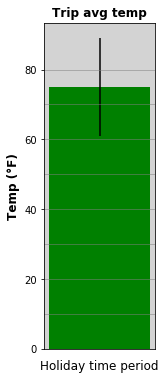

In [12]:
# Plot daily normals (min, max and avg temperature) for your planned trip as a bar chart

# Set standard error to difference between min and max temperature
y_err = max_temp - min_temp

# Set grid color
ax = plt.gca()
ax = plt.axes(facecolor='lightgray')

# Create bar plot
plt.bar(1, avg_temp, yerr = y_err, tick_label = "", color='green')

# Set labels for axes
plt.xlabel("Holiday time period", {'fontsize': 12})
plt.ylabel("Temp (°F)", {'fontsize': 12, 'fontweight' : 'bold'})

# Hide ticks on x axis
plt.tick_params(axis='x', bottom = False)

# Plot horizontal lines per 10 °F
for i in np.arange(0, (max_temp//10+1)*10,10):
    ax.axhline(i, color="gray", lw = 0.5)

# Set title and figure size
plt.title("Trip avg temp", {'fontsize': 12, 'fontweight' : 'bold'})
plt.rcParams["figure.figsize"] = (2,6)

plt.show()

In [13]:
#Rainfall per weather station for previous year's matching dates (based on your trip dates)
trip_prec_df = pd.DataFrame(sq.history_rainfall_trip(), columns=["Station", "Total prec"])
trip_prec_df

Enter start for your trip (use YYYY-MM-DD format): 2018-05-02
Enter end for your trip (use YYYY-MM-DD format): 2018-05-12


,Station,Total prec
0,USC00513117,2.07
1,USC00514830,1.91
2,USC00516128,2.56
3,USC00519281,2.69
4,USC00519397,0.01
5,USC00519523,0.74


In [14]:
# Calculate daily normals (min, max and avg temperature) for a specific date (use format MM-DD)
test_date = input("Enter date to calculate daily normals for (use MM-DD format): ")
normals_list = [row for row in sq.daily_normals(test_date)]
print("\n"
      f"Daily normals for {test_date} are: \n\n"
      f"minimum temperature (°F): {sq.daily_normals(test_date)[0][0]} \n"
      f"maximum temperature (°F): {sq.daily_normals(test_date)[0][2]} \n"
      f"average temperature (°F): {sq.daily_normals(test_date)[0][1]}")

Enter date to calculate daily normals for (use MM-DD format): 09-01

Daily normals for 09-01 are: 

minimum temperature (°F): 69 
maximum temperature (°F): 82 
average temperature (°F): 77.0


In [15]:
# Create a list of dates for your trip in the format %m-%d (MM-DD)
## Convert start and end date of the trip to date

trip_start  = input("Enter start for your trip (use YYYY-MM-DD format): ")
trip_end = input("Enter end for your trip (use YYYY-MM-DD format): ")

trip_start_conv = datetime.strptime(trip_start, '%Y-%m-%d').date()
trip_end_conv = datetime.strptime(trip_end, '%Y-%m-%d').date()
## Calculate length of trip (includes start and end date so add 1)
trip_days = int((trip_end_conv - trip_start_conv).days)+1
## Add to list in format %m-%d (MM-DD)
#trip_list = [(trip_start_conv + timedelta(days = i),
trip_list = [[(trip_start_conv + timedelta(days = i)).strftime('%Y-%m-%d'),
             (trip_start_conv + timedelta(days = i)).strftime('%m-%d')] for i in range(0,trip_days)]
## Convert start 

Enter start for your trip (use YYYY-MM-DD format): 2018-05-02
Enter end for your trip (use YYYY-MM-DD format): 2018-05-12


In [16]:
# Calculate the normals (min, max and avg temperature) using the daily_normals function 
# for each date string and append the results to a list
daily_norm = []
for trip_date in trip_list:
    daily_norm.append([trip_date[0], sq.daily_normals(trip_date[1])[0][0], 
                       round(sq.daily_normals(trip_date[1])[0][1]), 
                       sq.daily_normals(trip_date[1])[0][2]])

In [17]:
# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date
df = pd.DataFrame(daily_norm, columns = ["date","min_temp","avg_temp","max_temp"])
df["date"] = pd.to_datetime(df["date"]).dt.date
df.set_index(["date"], inplace = True)

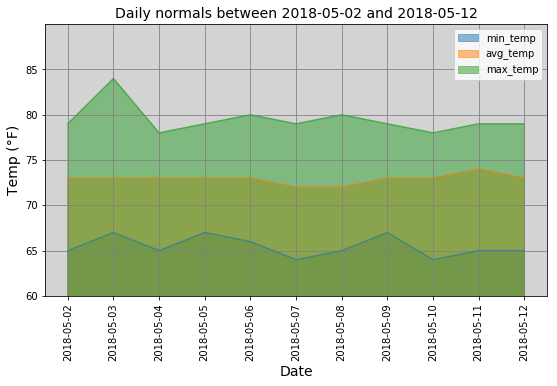

In [18]:
# Use Pandas to plot an area plot (stacked=False) for the daily normals

# Variables
x_min = df.index.min()
x_max = df.index.max() + timedelta(days=1)
y_min = 10*(df.max_temp.min()//10-1)
y_max = 10*(df.max_temp.max()//10+1)

# Create area plot
df.plot(kind='area', stacked=False, rot = 90, figsize=(9,5))

# Set labels and title
plt.title(f"Daily normals between {trip_start} and {trip_end}", size=14)
plt.xlabel("Date", size = 14)
plt.ylabel("Temp (°F)", size=14)

# Set scale and ticks
plt.ylim(y_min,y_max)
plt.yticks(np.arange(y_min,y_max,5))
plt.xticks(np.arange(x_min,x_max,1))

# Set grid 
plt.grid(color='gray', linestyle='solid')
ax = plt.gca()
ax.set_facecolor("lightgrey")

plt.show()